In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
from numpy import pi, exp
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.special import j1, erf
from scipy.ndimage.filters import gaussian_filter
from scipy.signal import wiener
%matplotlib nbagg

In [3]:
def airy(r, z, l, k):
    """Return complex scattering amplitude
    
      Parameters
    -----------
    r : np.array
        radius in observation plane
    z : float
        distance to observation plane
    l : float
        diameter of aperture
    k : float
        wavenumber of light   
    
    See : http://www.photonics.intec.ugent.be/download/ocs130.pdf
    """
    U = (
         exp(-1j * k * z) * exp((-1j * k  * r**2)/ (2*z)) *
         (k * l**2 / (1j * 8 * z)) *
         2 * j1(k * l * r / (2 * z)) / (k*l*r/(2*z))
        )
    return U

def get_amp_phase(U):
    return np.abs(U), np.angle(U)

## Parameter definitions
distances in microns

In [4]:
z = 10.e3 # pinhole-sample distance
l = 10.   # pinhole diameter
lam = 1e-3 * 12398/707 /10 # wavelength
k = pi/lam                 # wavenumber

## Compute Airy Pattern at sample 

<IPython.core.display.Javascript object>


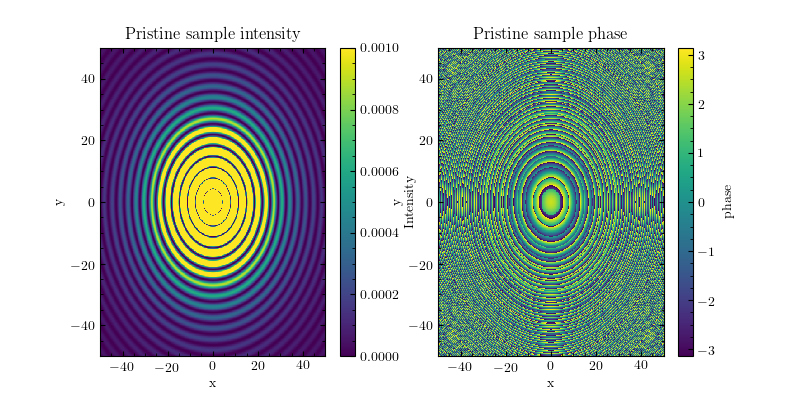

In [5]:
x = np.linspace(-50, 50, 500)
y = np.linspace(-50, 50, 500)
X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2)

U = airy(R, z, l, k)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8,4))

p_amp, p_phase = get_amp_phase(U)

art = ax0.pcolorfast(x, y, p_amp**2, vmin=0, vmax=.001)
cb = plt.colorbar(art, ax=ax0)
ax0.set_title('Pristine sample intensity')
ax0.set_xlabel('x')
ax0.set_ylabel('y')
cb.set_label('Intensity')

art = ax1.pcolorfast(x, y, p_phase)
cb = plt.colorbar(art, ax=ax1)
ax1.set_title('Pristine sample phase')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
cb.set_label('phase')

## Inspect linescuts of amplitude and phase

<IPython.core.display.Javascript object>


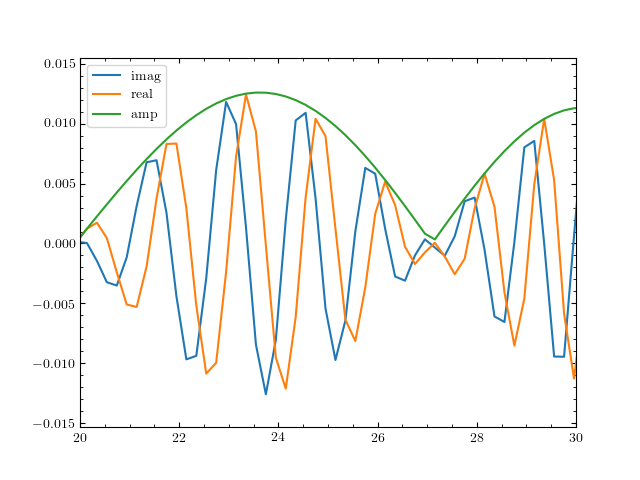

In [6]:
colors = [c['color'] for c in mpl.rcParams['axes.prop_cycle']]
fig, ax = plt.subplots()

a, p = get_amp_phase(U)

mod = np.exp(1j*np.pi/2*erf( (X-23.5)/3 ))
Usample = U*mod # weiner 4 washes out 



asample, psample = get_amp_phase(Usample)


ax.plot(X[40,:], np.imag(U)[:,40], label='imag', color=colors[0])
#ax.plot(X[40,:], np.imag(Usample)[:,40], ':', lw=4, alpha=0.5, label='imag mod', color=colors[0])
ax.plot(X[40,:], np.real(U)[:,40], label='real', color=colors[1])
#ax.plot(X[40,:], np.real(Usample)[:,40], ':', lw=4, alpha=0.5, label='real mod', color=colors[1])
ax.plot(X[40,:], a[:,40], label='amp', color=colors[2])
#ax.plot(X[40,:], asample[:,40], ':', lw=4, alpha=0.5, label='amp mod', color=colors[2])
#ax.plot(X[40,:], p[:,40]/100, label='phase', color=colors[3])
#ax.plot(X[40,:], psample[:,40]/100, ':', label='phase mod', color=colors[3])


ax.set_xlim([20,30])

ax.legend()

## Simulation
Adding a phase slip has minimal effect on the pattern only blurring out the singal 
(in this case with a wiener filter) has suppress intensity.
This doesn't seem particularly satisfactory.

<IPython.core.display.Javascript object>


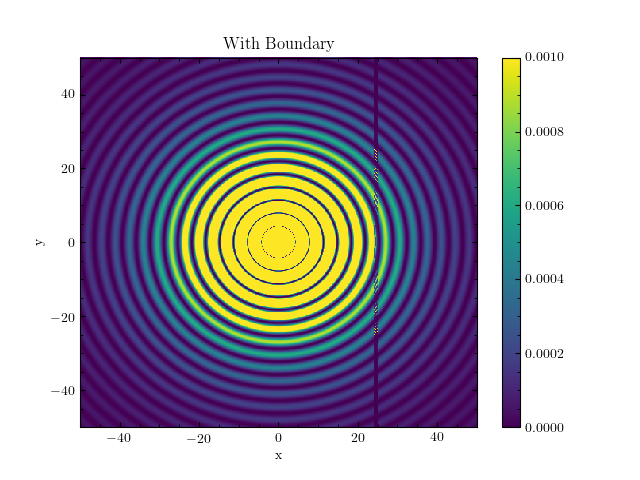

In [7]:
CHOOSE = np.logical_and(X>24, x<25)

Usample = np.copy(U)
Usample[CHOOSE] = wiener(U, 4)[CHOOSE]

fig, ax = plt.subplots()

art = ax.pcolorfast(x, y, np.abs(Usample)**2, vmin=0, vmax=0.001)
cb = plt.colorbar(art, ax=ax)
ax.set_title('With Boundary')
ax.set_xlabel('x')
ax.set_ylabel('y')
